#### Research Methods - Project - Daraz Roman Urdu Review Sentiment Analysis using Machine Learning
#### Muhammad Ali - F2020-591

##### Importing of necessary libraries

In [1]:
import pandas as pd
import numpy as np

##### Reading the dataset

In [2]:
data = pd.read_csv('daraz.csv')

##### Sentiments were written in upper and lower case, this snippet is converting all the sentiments into lowercase

In [3]:
data['Sentiments'] = data['Sentiments'].str.lower()

##### Generating the value counts report to view if there is any discrepancy

In [4]:
sentiment_counts = data['Sentiments'].value_counts()
print("Sentiment Category Report:")
print(sentiment_counts)

Sentiment Category Report:
Sentiments
positive    4694
negative    2635
neutral     1478
Name: count, dtype: int64


#### Distribution of sentiment labels in a bar chart

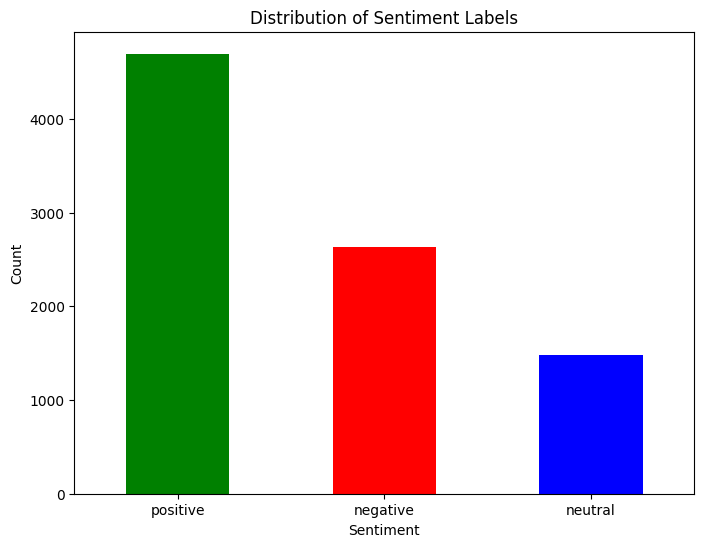

In [5]:
import matplotlib.pyplot as plt

sentiment_counts = data["Sentiments"].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind="bar", color=["green", "red", "blue"])
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

#### Word cloud of frequent terms

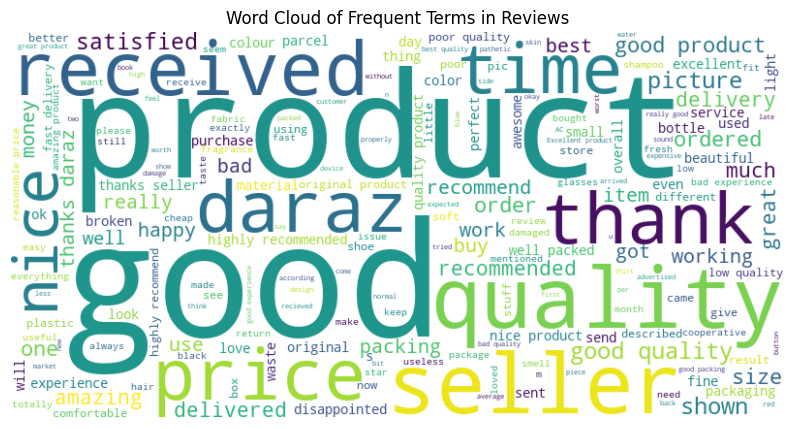

In [6]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    " ".join(data["Reviews"])
)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud of Frequent Terms in Reviews")
plt.axis("off")
plt.show()

##### Creating a preprocessing function for the text, using NLTK and PorterStemmer. Converting text to lower, removing punctuation including emojis, removing digits, word tokenization and stemming. This process is essential to remove irrelevant content which can cause discrepancy when evaluating.

In [7]:
import nltk
nltk.download('punkt')
import re
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s\d]+', '', text)
    text = re.sub(r'\d+', '', text)
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

data['Reviews'] = data['Reviews'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /Users/stormboi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### Creating the new raw_dataset with the changes made in the dataset as requested.

In [8]:
data.to_csv('raw_dataset.csv', index=False)

##### Creating a raw_dataset_info.txt file which clearly states the number of instances and features available in the dataset used, and is being done as requested.

In [9]:
raw_dataset_info = """
Raw Dataset Information:
- Source: daraz.csv
- Number of instances: {}
- Number of features: {}
- Target variable: Sentiments
- Description: This dataset contains customer reviews from daraz.com with sentiment labels.
""".format(len(data), data.shape[1])
with open('raw_dataset_info.txt', 'w') as f:
    f.write(raw_dataset_info)

##### TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer is used to convert the collection of raw documents into a matrix of TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(data['Reviews'])

##### The print(features) statement will display the TF-IDF feature matrix generated earlier, where each row represent a document (review) and each column represents a unique feature (word).
##### The print(features.shape) statement will display the shape of feature matrix. It will output a tuple that indicates the dimensions of matrix, where first element represents the number of documents (reviews) and the second element represents the number of features (unique words)

In [11]:
print(features)
print(features.shape)

  (0, 4071)	0.21954324665821068
  (0, 3455)	0.13787200599982613
  (0, 1232)	0.27069088956268783
  (0, 5924)	0.14608223715754395
  (0, 326)	0.28209656558197105
  (0, 761)	0.26354203366348716
  (0, 5787)	0.2764713495341716
  (0, 2470)	0.2862803350956513
  (0, 428)	0.19565138632789228
  (0, 742)	0.20976348286058175
  (0, 5879)	0.21483285878715963
  (0, 336)	0.2551281719943653
  (0, 3593)	0.1939336076380303
  (0, 5373)	0.150774434001794
  (0, 3489)	0.1510981550020114
  (0, 5755)	0.4081604419161798
  (0, 1319)	0.17016823632632314
  (0, 196)	0.09529295657404316
  (0, 3979)	0.10362178103350309
  (0, 3542)	0.19668460588275974
  (1, 2947)	0.40797147493369634
  (1, 5802)	0.31568308723383837
  (1, 1938)	0.14590986571875839
  (1, 4238)	0.15104717396934472
  (1, 2342)	0.2032944166725816
  :	:
  (8805, 5948)	0.22316862696600495
  (8805, 74)	0.3618610030336882
  (8805, 1202)	0.20392159848542613
  (8805, 1311)	0.249112471682315
  (8805, 5270)	0.14355347006387123
  (8805, 4603)	0.19477631663674227
  (8

##### Using the np.save() function to save the feature matrix as a numpy binary file, which can be easily loaded and accessed later.

In [12]:
np.save('dataset_with_features.npy', features.toarray(), allow_pickle=True)

##### Creating a extracted_features_info.txt file to point out the main feature extraction technique, vocabulary size, and the preprocessing steps used.

In [13]:
features_info = """
Extracted Features Information:
- Feature Extraction Technique: TF-IDF
- Vocabulary Size: {}
- Preprocessing Steps: Preprocessed the reviews by converting to lowercase, removing punctuation and digits, and stemming.
""".format(len(vectorizer.vocabulary_))

with open('extracted_features_info.txt', 'w') as f:
    f.write(features_info)

##### Splitting the dataset into training and testing set, and using for training i have used 80% of the data and for testing 20%. Method used was train_test_split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, data['Sentiments'], test_size=0.2, random_state=42)

##### Several classification models are imported. These models will be used for training and predicting sentiments analysis on the dataset. These models will also be used later for hyperparameter tuning and evaluation using cross-validation through GridSearchCV

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

##### Initializing the paramater grids for each classification model for performing hyperparameter tuning.

In [22]:
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Naive Bayes': {'alpha': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'KNeighbors': {'n_neighbors': [3, 5, 7]},
    'SVM': {'C': [0.1, 1, 10]}
}


##### The classification models are evaluated and their performance is assessed using the F1 score metric. This process helps in identifying the best hyperparameters for each classifier using cross-validation and evaluates their performance using the F1 score. The F1 score provides a measure of the classifier's accuracy, precision, and recall, taking into account both false positives and false negatives.

Logistic Regression:
Best Parameters: {'C': 1}
Best Score: 0.8569191307137354
F1 Score: 0.8746422086767469



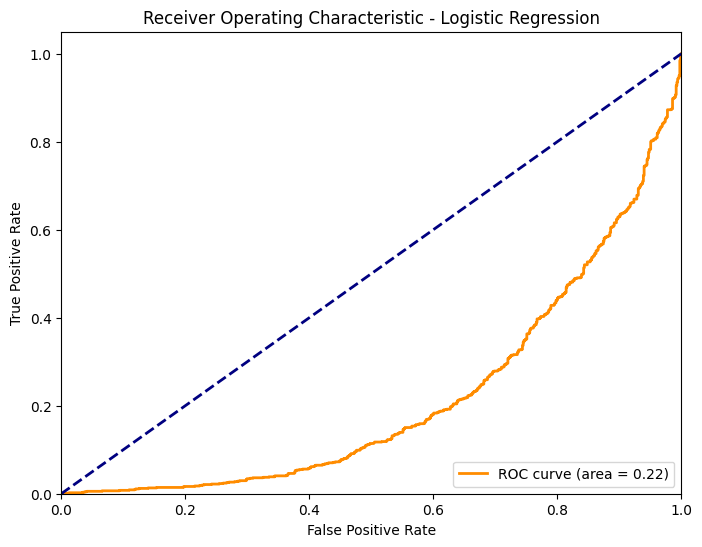

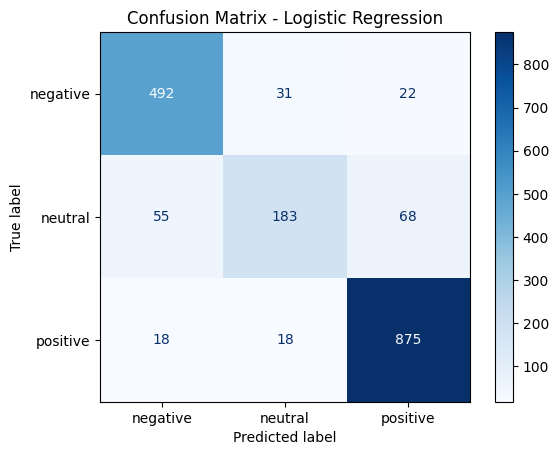

Naive Bayes:
Best Parameters: {'alpha': 0.1}
Best Score: 0.8114971054653967
F1 Score: 0.8202328651175538



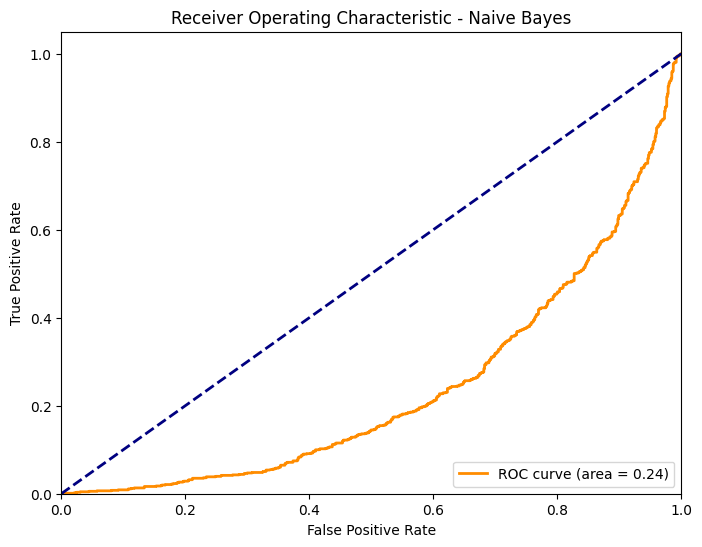

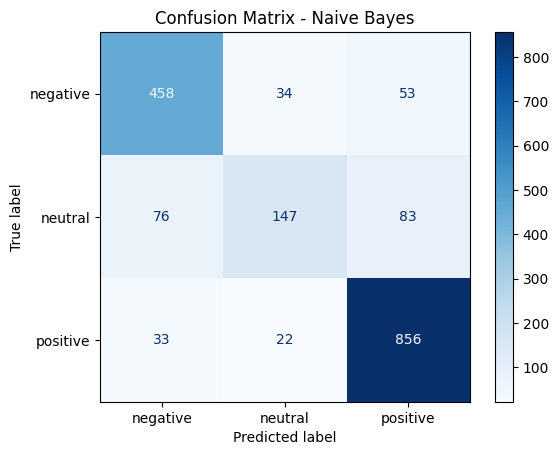

Random Forest:
Best Parameters: {'n_estimators': 200}
Best Score: 0.8404532091537255
F1 Score: 0.8404226460740483



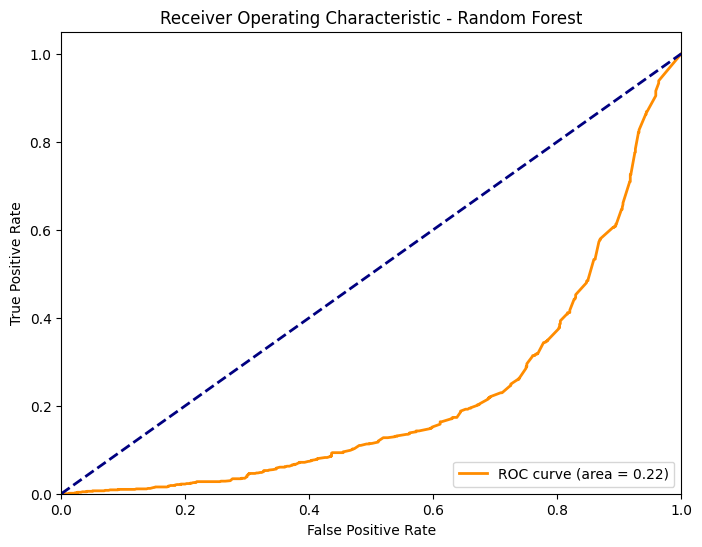

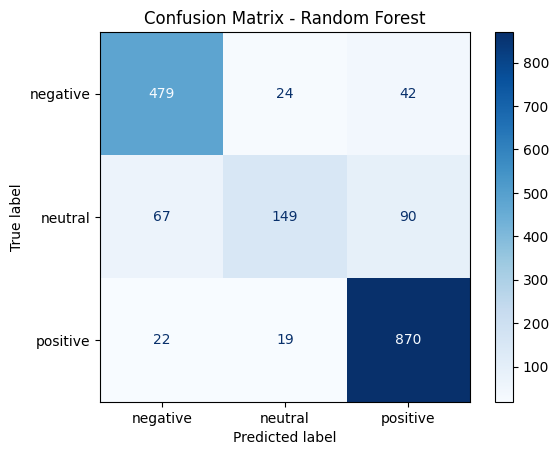

KNeighbors:
Best Parameters: {'n_neighbors': 7}
Best Score: 0.781121172540951
F1 Score: 0.7689134324076945



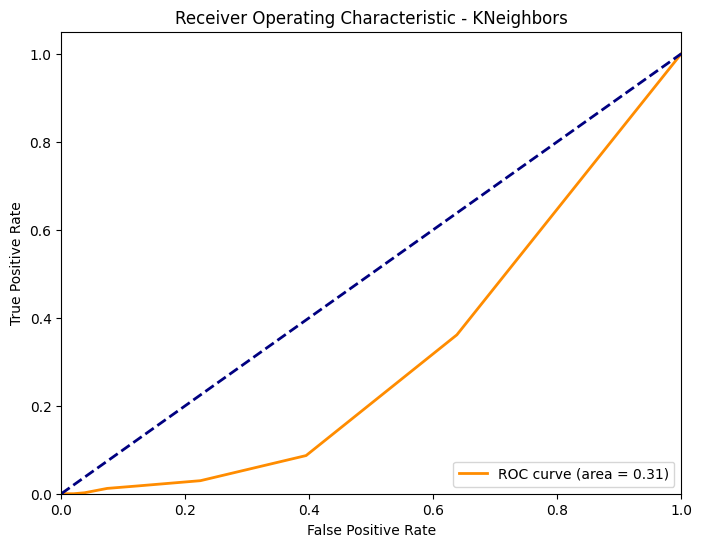

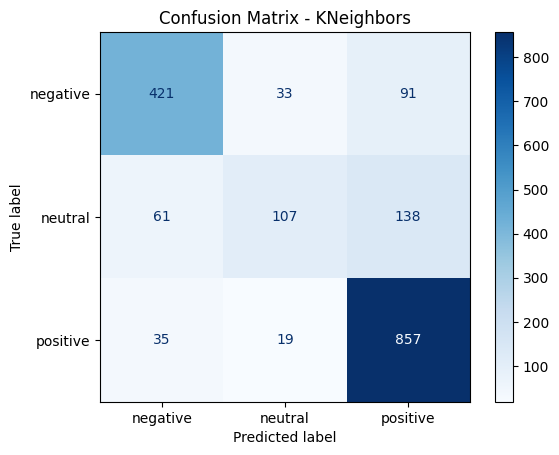

SVM:
Best Parameters: {'C': 1}
Best Score: 0.8594742552378299
F1 Score: 0.8787309381530819



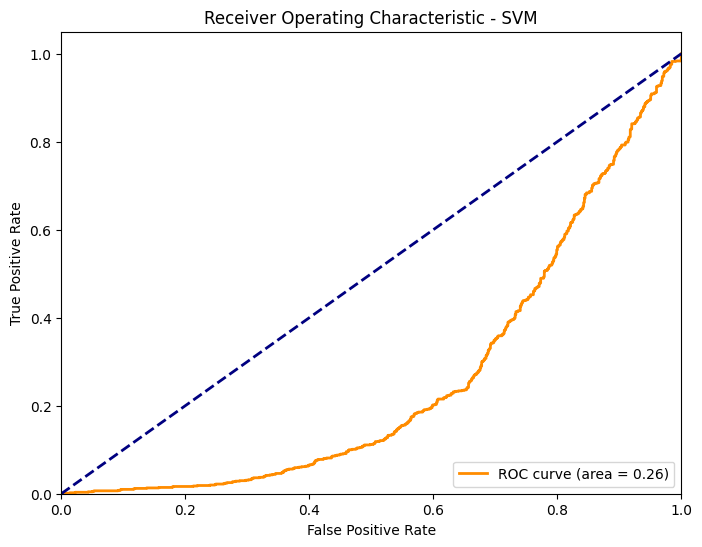

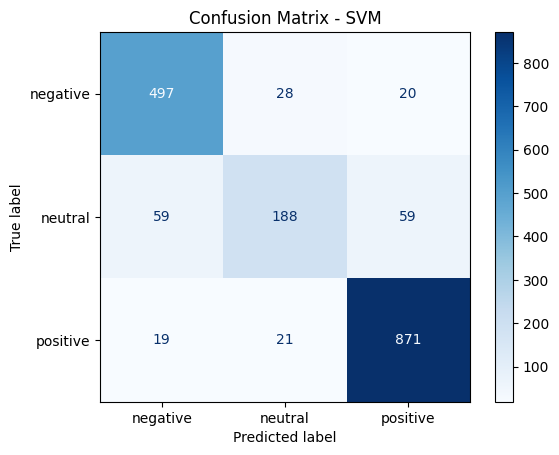

In [23]:
from sklearn.metrics import (
    f1_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

for clf_name, clf in classifiers.items():
    param_grid = param_grids[clf_name]
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring="accuracy")
    grid_result = grid.fit(X_train, y_train)

    best_params = grid_result.best_params_
    best_score = grid_result.best_score_

    best_clf = clf.set_params(**best_params)
    best_clf.fit(X_train, y_train)

    y_pred = best_clf.predict(X_test)
    y_proba = best_clf.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"{clf_name}:")
    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"F1 Score: {f1}\n")

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(
        y_test, y_proba, pos_label="positive"
    )  # Adjust pos_label based on your dataset
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(
        fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})"
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Receiver Operating Characteristic - {clf_name}")
    plt.legend(loc="lower right")
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {clf_name}")
    plt.show()

##### The best model obtained from the classification task is saved using the pickle module. By saving the best model, it can be later loaded and used for making predictions on new, unseen data without the need to retrain the model. The saved model file can be loaded using the pickle.load() function, allowing you to access the trained model and use it for inference tasks.

In [29]:
import pickle

best_model = SVC(C=1, probability=True)

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

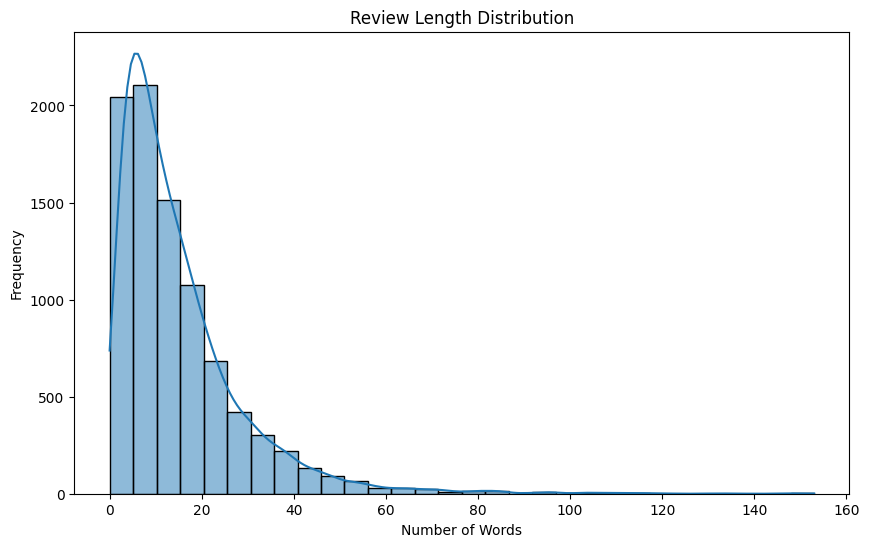

In [30]:
import seaborn as sns

data["Review_Length"] = data["Reviews"].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data["Review_Length"], bins=30, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

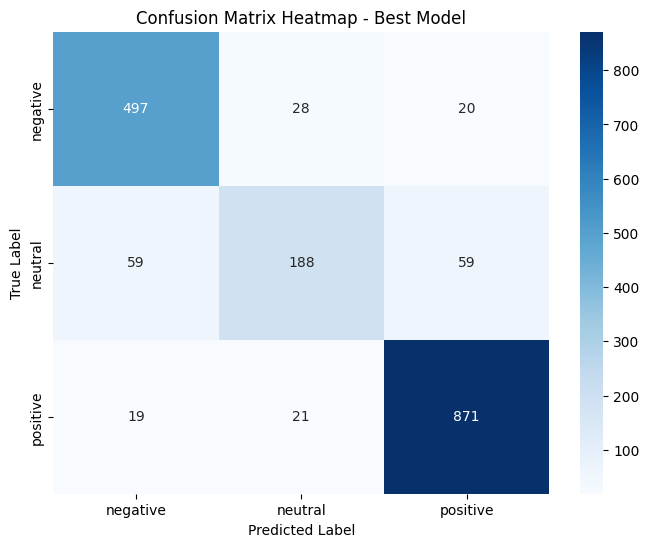

In [31]:
best_clf = best_model.set_params(C=1)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=best_clf.classes_,
    yticklabels=best_clf.classes_,
)
plt.title("Confusion Matrix Heatmap - Best Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/var/folders/dx/f30m_5m134165ly_5chnq6q80000gn/T/ipykernel_39682/570646980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Sentiments", palette="viridis")


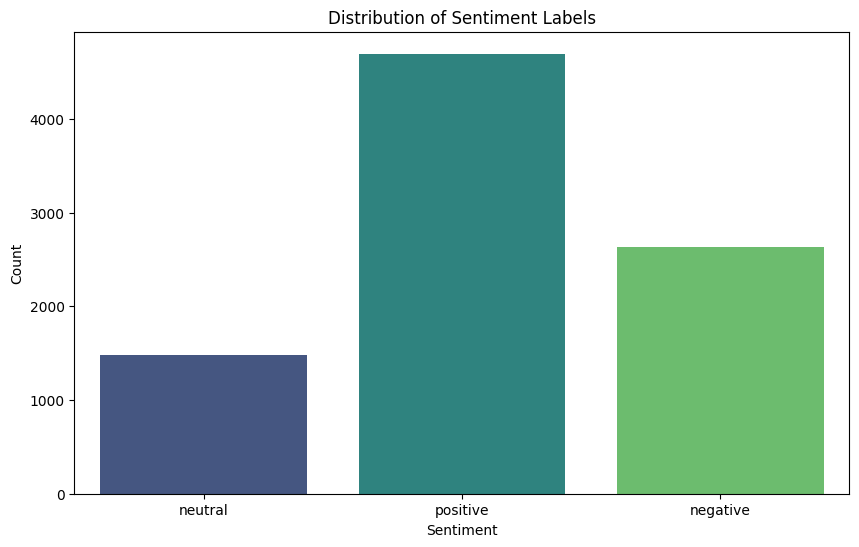

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Sentiments", palette="viridis")
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

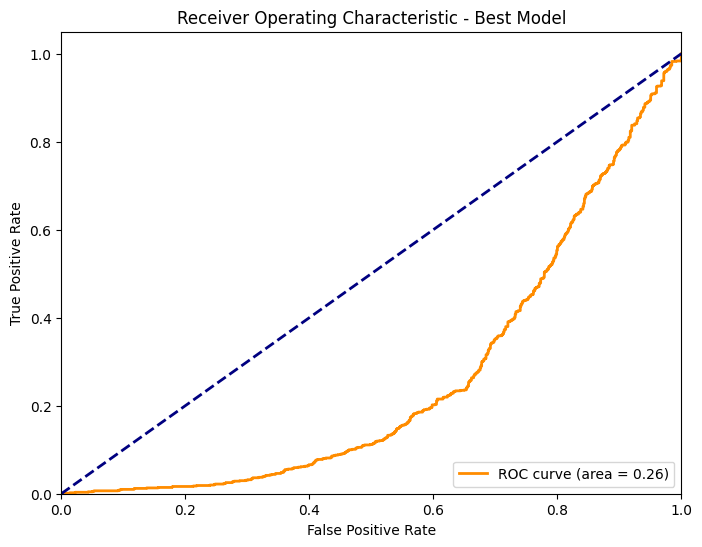

In [33]:
y_proba = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(
    y_test, y_proba, pos_label="positive"
)  # Adjust pos_label based on your dataset
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic - Best Model")
plt.legend(loc="lower right")
plt.show()

In [34]:
performance_metrics = f"""
Best Model Performance Metrics:
- Model: SVM
- Best Parameters: {best_params}
- Best Cross-Validation Score: {best_score}
- F1 Score: {f1}
- ROC AUC: {roc_auc}
"""
with open("best_model_performance_metrics.txt", "w") as f:
    f.write(performance_metrics)

In [35]:
import pickle
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score

new_reviews = pd.read_csv(
    "muhammad-ali-test-data.txt",
    delimiter="\t",
    header=None,
    names=["Sentiment", "Reviews"],
)
preprocessed_reviews = [preprocess_text(review) for review in new_reviews["Reviews"]]

with open("best_model.pkl", "rb") as f:
    best_model = pickle.load(f)

new_features = vectorizer.transform(preprocessed_reviews)
best_model.fit(X_train, y_train)
predictions = best_model.predict(new_features)

with open("muhammad-ali-predictions.txt", "w") as f:
    for prediction in predictions:
        f.write(prediction + "\n")

true_labels = new_reviews["Sentiment"]
f1 = f1_score(true_labels, predictions, average="weighted")
accuracy = accuracy_score(true_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8791946308724832
F1 Score: 0.8757085323186373


Logistic Regression:
Best Parameters: {'C': 1}
Best Score: 0.8569191307137354
F1 Score: 0.8746422086767469



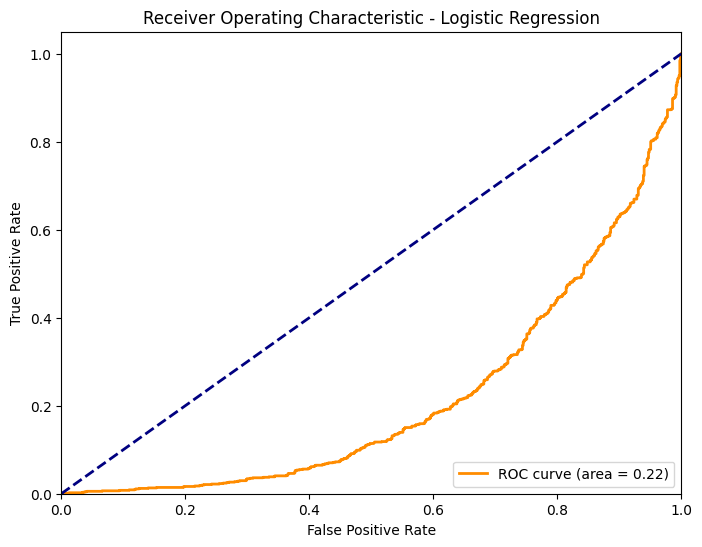

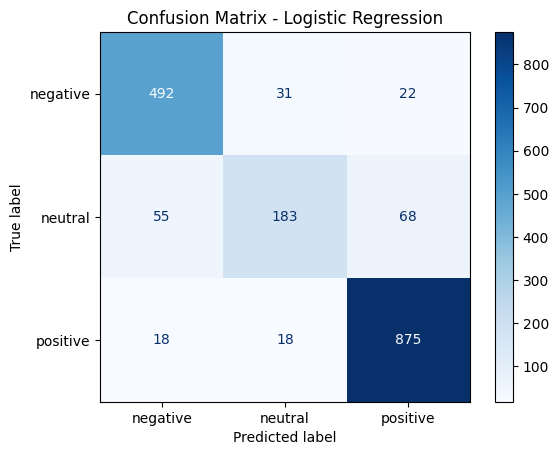

Naive Bayes:
Best Parameters: {'alpha': 0.1}
Best Score: 0.8114971054653967
F1 Score: 0.8202328651175538



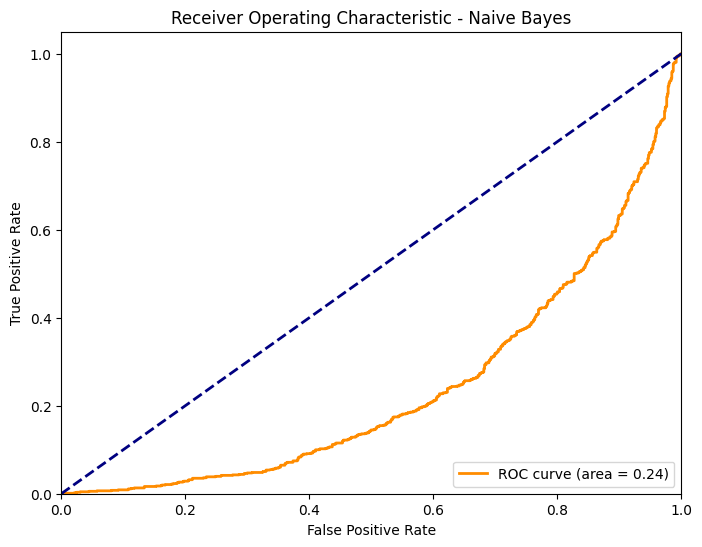

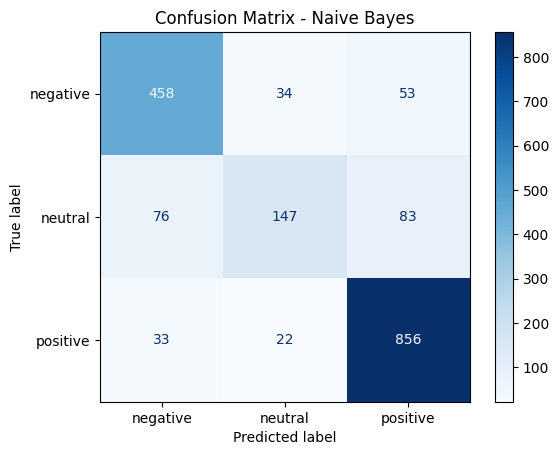

Random Forest:
Best Parameters: {'n_estimators': 200}
Best Score: 0.8404532091537255
F1 Score: 0.8404226460740483



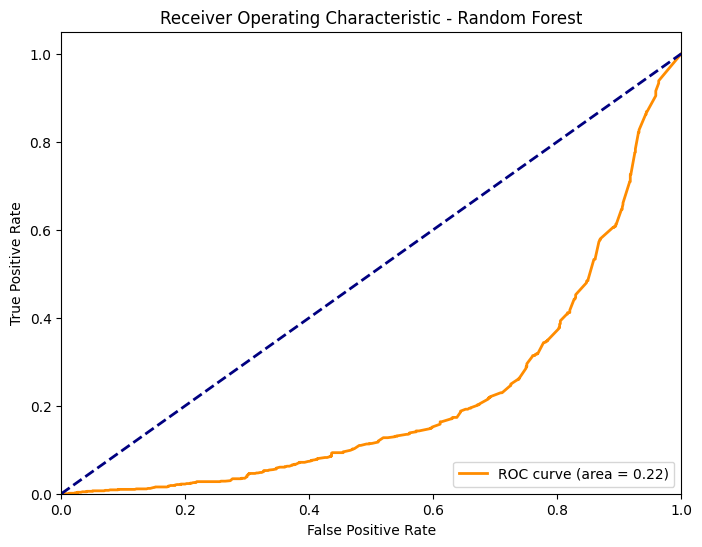

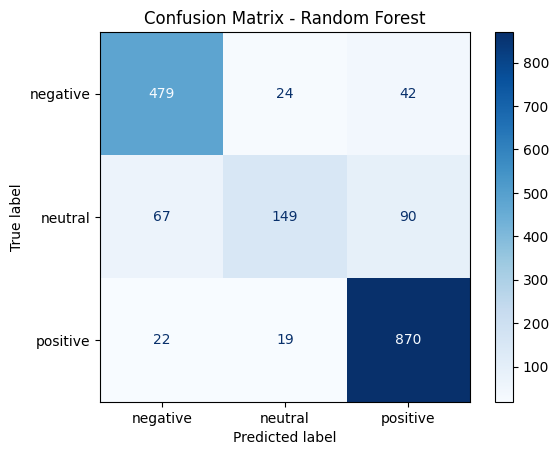

KNeighbors:
Best Parameters: {'n_neighbors': 7}
Best Score: 0.781121172540951
F1 Score: 0.7689134324076945



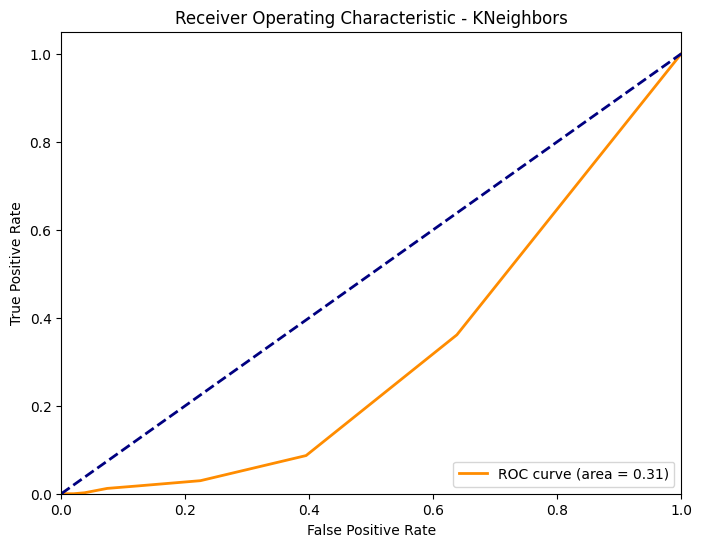

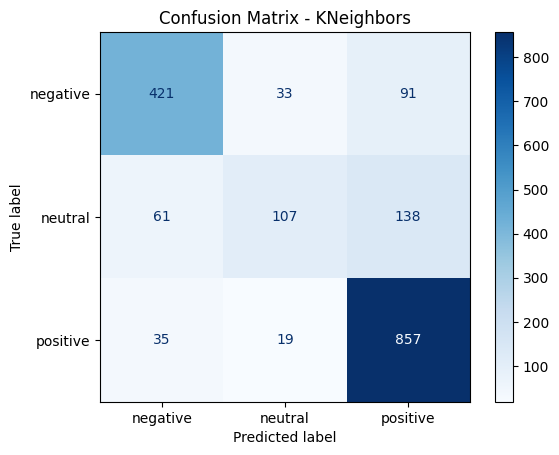

SVM:
Best Parameters: {'C': 1}
Best Score: 0.8594742552378299
F1 Score: 0.8787309381530819



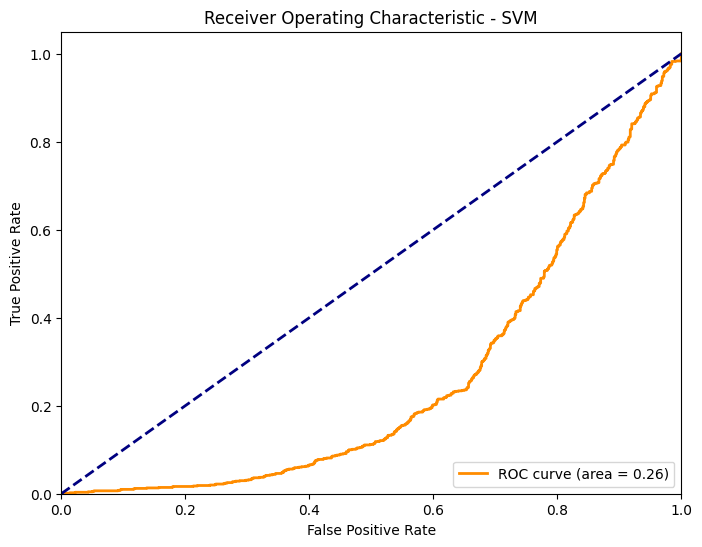

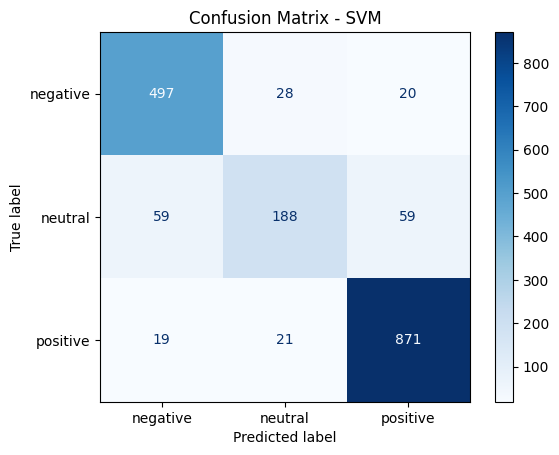

In [ ]:
from sklearn.metrics import (
    f1_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

for clf_name, clf in classifiers.items():
    param_grid = param_grids[clf_name]
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring="accuracy")
    grid_result = grid.fit(X_train, y_train)

    best_params = grid_result.best_params_
    best_score = grid_result.best_score_

    best_clf = clf.set_params(**best_params)
    best_clf.fit(X_train, y_train)

    y_pred = best_clf.predict(X_test)
    y_proba = best_clf.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"{clf_name}:")
    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"F1 Score: {f1}\n")

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(
        y_test, y_proba, pos_label="positive"
    )  # Adjust pos_label based on your dataset
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(
        fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})"
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Receiver Operating Characteristic - {clf_name}")
    plt.legend(loc="lower right")
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {clf_name}")
    plt.show()